## MNIST DL CNN learning demo

## Referance:
https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99

https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6/notebook


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [5]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [10]:
train_file = "./input/train.csv"
test_file = "./input/test.csv"
output_file = "submission.csv"

In [22]:
# train set
train = pd.read_csv(train_file)
train_Y = train["label"]
train_X = train.drop(labels = ["label"],axis = 1)

In [23]:
# test set
test = pd.read_csv(test_file)

In [24]:
train_Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [25]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [26]:
# Normalization
train_X = train_X / 255.

In [27]:
# the image should be width = height = 28, channel = 1
# reshape
train_X = train_X.values.reshape(-1, 28, 28, 1)

In [28]:
print(train_X.shape)

(42000, 28, 28, 1)


In [29]:
# lable encoding to one-hot key
# example 2 -> [0,0,1,0,0,0,0,0,0,0]
train_Y = to_categorical(train_Y, num_classes=10)

In [30]:
train_Y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
seed = 2

In [32]:
# split the train set into train set into train and dev set
train_X, dev_X, train_Y, dev_Y = train_test_split(train_X, train_Y, test_size=0.1, random_state=seed)

In [33]:
fig = plt.imshow(train_X[0][:,:,0])

## CNN

In [34]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',
                input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

# fully connection
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [35]:
datagen = ImageDataGenerator(zoom_range=0.1, height_shift_range=0.1, width_shift_range=0.1, rotation_range=10)

In [36]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

学习速率衰减

In [37]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [38]:
hist = model.fit_generator(datagen.flow(train_X, train_Y, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(dev_X[:400,:], dev_Y[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
 - 32s - loss: 0.7997 - acc: 0.7479 - val_loss: 0.1102 - val_acc: 0.9650
Epoch 2/20
 - 34s - loss: 0.3188 - acc: 0.9025 - val_loss: 0.0647 - val_acc: 0.9800
Epoch 3/20
 - 32s - loss: 0.2261 - acc: 0.9310 - val_loss: 0.0685 - val_acc: 0.9775
Epoch 4/20
 - 41s - loss: 0.2066 - acc: 0.9373 - val_loss: 0.0638 - val_acc: 0.9825
Epoch 5/20
 - 33s - loss: 0.1712 - acc: 0.9491 - val_loss: 0.0477 - val_acc: 0.9800
Epoch 6/20
 - 34s - loss: 0.1685 - acc: 0.9520 - val_loss: 0.0403 - val_acc: 0.9875
Epoch 7/20
 - 37s - loss: 0.1442 - acc: 0.9591 - val_loss: 0.0248 - val_acc: 0.9950
Epoch 8/20
 - 35s - loss: 0.1357 - acc: 0.9596 - val_loss: 0.0254 - val_acc: 0.9925
Epoch 9/20
 - 34s - loss: 0.1226 - acc: 0.9616 - val_loss: 0.0215 - val_acc: 0.9950
Epoch 10/20
 - 36s - loss: 0.1072 - acc: 0.9684 - val_loss: 0.0229 - val_acc: 0.9950
Epoch 11/20
 - 43s - loss: 0.1099 - acc: 0.9679 - val_loss: 0.0240 - val_acc: 0.9900
Epoch 12/20
 - 43s - loss: 0.0991 - acc: 0.9700 - val_loss: 0.0267 - val_a

In [39]:
final_loss, final_acc = model.evaluate(dev_X, dev_Y, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0249, final accuracy: 0.9917


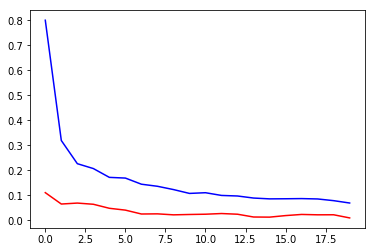

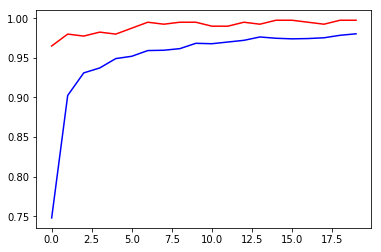

In [41]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [42]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [43]:
y_hat = model.predict(x_test, batch_size=64)

In [44]:
y_pred = np.argmax(y_hat,axis=1)

In [45]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))